In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
class adalineGD():
    
    def __init__(self, eta = 0.1, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        #shape of X = [n_examples, n_features]
        #shape of y = [n_examples]
        
        rgen = np.random.RandomState(self.random_state)
        self._w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self._cost = []
        #updating weights and calcuationg sum of squares error which is our cost function
        #the main idea is to minimize cost function by updating by taking the step in the opposite direction of the cost gradient
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self._w[1:] += self.eta*np.dot(X.T, errors)
            self._w[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self._cost.append(cost)
            
        return self

    def net_input(self, X):
        return np.dot(X, self._w[1:]) + self._w[0]
    
    def activation(self, X):
        return X #linear activation function
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)

In [9]:
#Using the same dataset as used in linear perceptron model 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, encoding = 'utf-8')
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100, [0,2]].values

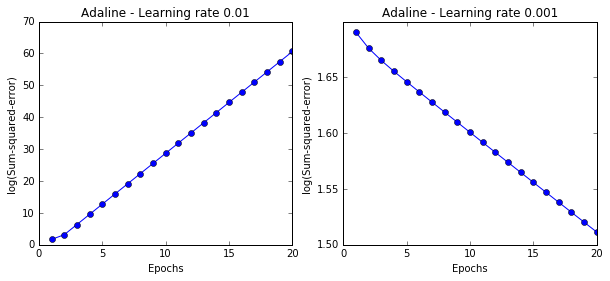

In [12]:
#Experimenting with the learning rate
fig, ax = plt.subplots(1, 2, figsize = (10,4))
ada1 = adalineGD(n_iter=20, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1._cost)+1), np.log10(ada1._cost), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = adalineGD(n_iter=20, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2._cost)+1), np.log10(ada2._cost), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.001')

plt.show()

In [13]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X, y, classifier, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max, resolution))
    #xx1, xx2 are the coordinates of x and y respectively, we pair each value of the two corresponding matrices and get a grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x =X[y==c1,0],
                    y = X[y==c1,1],
                    alpha =0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = c1, edgecolor='black')

In [22]:
#Using feture Standarddization to help the optimizer convege to the optimal solution in fewer steps
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - np.mean(X[:,0]))/np.std(X[:,0])
X_std[:,1] = (X[:,1] - np.mean(X[:,1]))/np.std(X[:,1])

C:\Users\ashish\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\ashish\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


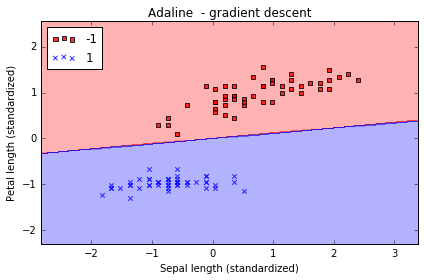

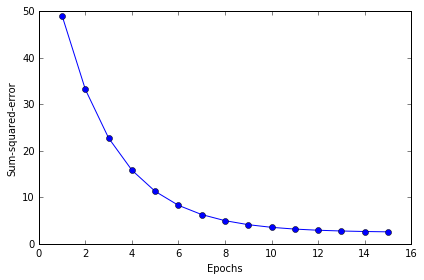

In [28]:
ada_gd = adalineGD(n_iter=15, eta = 0.01)
ada_gd.fit(X_std, y)
plotDecisionRegion(X_std, y,classifier=ada_gd)
plt.title("Adaline  - gradient descent")
plt.xlabel("Sepal length (standardized)")
plt.ylabel("Petal length (standardized)")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd._cost)+1),ada_gd._cost, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()